In [39]:
from pynta.postprocessing import *
from ase.visualize import view
from ase.io import read
from ase.io.trajectory import Trajectory
import json

✅ Patched scipy.linalg.lapack.dsyevr


# Surface Information and Reference Energies

In [40]:
path = "/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem"

#Surface information
metal = "Fe" #specify the metal
facet = "bcc110" #specify the facet
slab = read("/projects/westgroup/lekia.p/pynta/Fe/slab.xyz")
nslab = len(slab)
site_density = get_site_density(slab,metal,facet)

#Site Information
cas = SlabAdsorptionSites(slab, facet,allow_6fold=False,composition_effect=False,
                            label_sites=True,
                            surrogate_metal=metal)
sites = cas.get_sites()
site_adjacency = cas.get_neighbor_site_list()

#Reference Energies
c_ref,o_ref,h_ref,n_ref,finished_atoms = get_reference_energies(os.path.join(path,"Adsorbates"),nslab)

## Calculate Adsorption Energies

In [41]:
get_reference_energies(os.path.join(path,"Adsorbates"),nslab)

(-1100.6012040970845,
 -2079.2808830358927,
 -31.306002607381693,
 -1537.877438520133,
 ['H', 'C', 'O', 'N'])

In [4]:

import pandas as pd
import os

# Find all TS directories

ts_dirs = [d for d in os.listdir(path) if d.startswith('TS') and os.path.isdir(os.path.join(path, d))]

# Collect all data
all_data = []

for ts in sorted(ts_dirs):
    ts_path = os.path.join(path, ts)
    Es, thermos, fs = get_energies(path, ts_path)
    
    for r in Es.keys():
        all_data.append({
            'TS': ts,
            'Record': r,
            'Energy(E+ZPE-Eslab-AEC)': Es[r],
            'Internal energy(eV)': thermos[r].get_internal_energy(300),
            'Entropy(eV/K)': thermos[r].get_entropy(300),
            'Helmholtz free energy(eV)': thermos[r].get_helmholtz_energy(300),
            'ZPE correction(eV)': thermos[r].get_ZPE_correction(),
            'Frequency': fs[r]
        })

# Create combined dataframe
df_combined = pd.DataFrame(all_data).sort_values(['TS', 'Energy(E+ZPE-Eslab-AEC)'])

df_combined

<Molecule "O=O.[Pt].[Pt]">
Internal energy components at T = 300.00 K:
E_pot                -13.793 eV
E_ZPE                  0.105 eV
Cv_harm (0->T)         0.058 eV
-------------------------------
U                    -13.630 eV
Entropy components at T = 300.00 K:
                           S               T*S
S_harm             0.0003435 eV/K        0.103 eV
-------------------------------------------------
S                  0.0003435 eV/K        0.103 eV
Internal energy components at T = 300.00 K:
E_pot                -13.793 eV
E_ZPE                  0.105 eV
Cv_harm (0->T)         0.058 eV
-------------------------------
U                    -13.630 eV

Entropy components at T = 300.00 K:
                           S               T*S
S_harm             0.0003435 eV/K        0.103 eV
-------------------------------------------------
S                  0.0003435 eV/K        0.103 eV

Free energy components at T = 300.00 K:
    U        -13.630 eV
 -T*S         -0.103 eV
---------

,TS,Record,Energy(E+ZPE-Eslab-AEC),Internal energy(eV),Entropy(eV/K),Helmholtz free energy(eV),ZPE correction(eV),Frequency
1,TS1,3,-17.488465,-17.433452,0.000302,-17.524169,0.102737,"[187.1935143259381j, (181.8867502635818+0j), (..."
2,TS1,7,-17.129723,-17.065028,0.000346,-17.168907,0.123256,"[(237.82857032181113+0j), (244.45747370353615+..."
0,TS1,24,-13.687769,-13.630245,0.000343,-13.733284,0.104806,"[64.90011698434884j, (127.39044444236171+0j), ..."
3,TS2,1,-25.388398,-25.319600,0.000371,-25.430758,0.712165,"[186.81173801666299j, (151.99013061745234+0j),..."
4,TS2,13,-25.266849,-25.185979,0.000426,-25.313759,0.526596,"[1348.412618575875j, (218.90662565480858+0j), ..."
5,TS2,19,-25.114638,-25.052930,0.000331,-25.152239,0.607138,"[1166.483600688646j, (138.7521525129464+0j), (..."
6,TS2,32,-24.865840,-24.802211,0.000320,-24.898181,0.593459,"[1360.9911755118883j, (272.2162929636247+0j), ..."
7,TS3,10,-12.586220,-12.540956,0.000256,-12.617880,0.150472,"[1020.177753906159j, (174.93777347175973+0j), ..."
9,TS3,22,-12.406510,-12.366042,0.000211,-12.429379,0.189377,"[1374.5680898305275j, (272.1105774334505+0j), ..."
8,TS3,18,-12.406482,-12.363284,0.000230,-12.432292,0.167203,"[1224.9054297906669j, (248.31867105170443+0j),..."


In [5]:
import ase.units
from ase.db import connect
ad_path = os.path.join(path,"Adsorbates")
slab_path = "/projects/westgroup/lekia.p/pynta/Fe/slab.xyz"
write_min_en_species_db(ad_path, slab_path)
db = read("/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/min_E_ads.db")
db_c = connect('/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/min_E_ads.db')
db_c

 for /projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/C/0 
 we have imaginary freq 
 setting to 12cm^-1
 for /projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/C/0 
 we have imaginary freq 
 setting to 12cm^-1
 for /projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/C/0 
 we have imaginary freq 
 setting to 12cm^-1
 for /projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/C/0 
 we have imaginary freq 
 setting to 12cm^-1


# Analyze Species

In [6]:
# references_available = True #check if thermodynamic references were available and thus the thermochemistry is properly referenced
# for elm in spc.mol.get_element_count().keys():
#     if elm not in finished_atoms and elm != 'X': #we don't have appropriate references for this species
#         references_available = False

In [7]:
# if references_available:
#     print("Hf298: {} kcal/mol".format(spc.heat_of_formation_298K/4184.0))
#     print("Sf298: {} cal/(mol K)".format(spc.entropy_of_formation_298K/4.184))

In [8]:
#view(spc.atoms) #see individual configuration

In [9]:
# #Specific Thermodynamic Properties J-mol-K
# T = 1000.0
# if references_available:
#     print("Gf(T={0}): {1} kcal/mol".format(T,spc.nasa.get_free_energy(T)/4184.0))
#     print("Hf(T={0}): {1} kcal/mol".format(T,spc.nasa.get_enthalpy(T)/4184.0))
#     print("Sf(T={0}): {1} cal/(mol K)".format(T,spc.nasa.get_entropy(T)/4.184))
#     print("Cp(T={0}): {1} cal/(mol K)".format(T,spc.nasa.get_heat_capacity(T)/4.184))

In [23]:
# Get all adsorbates
adsorbates_path = os.path.join(path, "Adsorbates")
adsorbates = os.listdir(adsorbates_path)

data = []
for ads in adsorbates:
    ad_path = os.path.join(adsorbates_path, ads)
    if not os.path.isdir(ad_path):
        continue
        
    spcs = get_species(ad_path, os.path.split(ad_path)[0], metal, facet, slab, sites, 
                      site_adjacency, nslab, c_ref=c_ref, o_ref=o_ref, h_ref=h_ref, n_ref=n_ref)
    
    # Get minimum valid species
    valid = {k: v for k, v in spcs.items() if v.valid}
    if valid:
        min_key = min(valid, key=lambda x: spcs[x].energy)
        min_spc = spcs[min_key]
        try:
            freqs = min_spc.vibdata.get_frequencies()
        except:
            freqs = None
        data.append({
            'Adsorbate': ads,
            'Energy': min_spc.energy,
            'dHads': getattr(min_spc, 'dHads', None),  # None if not SurfaceConfiguration
            'Freqs': freqs,
            'Config': min_key
        })

df = pd.DataFrame(data).sort_values('Energy')
df

,Adsorbate,Energy,dHads,Freqs,Config
6,O=O,-4089.672919,NaN,"[0.01848912451626377j, 0.00034515411065303266j...",0
5,O,-2079.280883,NaN,"[67.04112511546133j, 64.1334914572855j, 0.1161...",0
1,N,-1537.877439,NaN,"[29.787436792508615j, 20.553020128368907j, (0....",0
0,C,-1100.601204,NaN,"[42.19807208358535j, 39.568497299086324j, 21.2...",0
4,N[Pt],-197.149752,-18.017011,"[(135.54513402972748+0j), (254.1027070181176+0...",2
3,N=[Pt],-194.434370,-15.301629,"[(227.54457957209263+0j), (315.7175083056987+0...",0
8,O[Pt],-192.203247,-13.070506,"[(193.693900482771+0j), (197.31048370355575+0j...",1
2,N#[Pt],-190.992505,-11.859764,"[(232.2385931524862+0j), (278.11415608089425+0...",1
7,O=[Pt],-189.428986,-10.296245,"[(242.90409759483745+0j), (310.4845472069281+0...",1
10,[Pt],-185.172770,-6.040029,"[(597.0100702175406+0j), (655.8486444088513+0j...",1


In [13]:
view(read("/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/N[Pt]/0/0.xyz"), viewer="x3d")

In [14]:
view(read("/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/N[Pt]/1/1.xyz"), viewer="x3d")

In [15]:
view(read("/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/N[Pt]/2/2.xyz"), viewer="x3d") # This has the minimum energy conguration

In [16]:
view(read("/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates/N[Pt]/3/3.xyz"), viewer="x3d")

In [3]:
# Import required libraries and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import re
from ase.io import read
from ase.thermochemistry import HarmonicThermo
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

print("✓ Libraries imported successfully")
print(f"Current working directory: {os.getcwd()}")

✓ Libraries imported successfully
Current working directory: /projects/westgroup/lekia.p/pynta/IPython


In [4]:
# Cell 2: Define frequency parsing functions
def parse_frequency_string(freq_str):
    """
    Parse frequency string format "(value+0j)" or "(real+imagj)"
    Returns a complex number
    """
    # Remove parentheses and spaces
    freq_str = freq_str.strip().strip('()')
    
    try:
        # Try direct conversion
        return complex(freq_str)
    except:
        # Manual parsing for edge cases
        # Handle formats like "135.295+0j" or "0+64.9j"
        match = re.match(r'([+-]?\d*\.?\d*)\s*([+-])\s*(\d*\.?\d*)j', freq_str)
        if match:
            real = float(match.group(1)) if match.group(1) else 0
            sign = 1 if match.group(2) == '+' else -1
            imag = float(match.group(3)) if match.group(3) else 0
            return complex(real, sign * imag)
        
        # Try to parse as real number only
        try:
            return complex(float(freq_str), 0)
        except:
            raise ValueError(f"Could not parse frequency string: {freq_str}")

In [5]:
def load_frequencies_from_json(vib_json_path):
    """
    Load frequencies from vib.json file with string format
    """
    with open(vib_json_path, 'r') as f:
        vib_data = json.load(f)
    
    # Parse frequency strings
    freq_strings = vib_data.get('frequencies', [])
    frequencies = []
    
    for freq_str in freq_strings:
        try:
            freq = parse_frequency_string(freq_str)
            frequencies.append(freq)
        except Exception as e:
            print(f"Error parsing frequency '{freq_str}': {e}")
            frequencies.append(complex(0, 0))
    
    return np.array(frequencies), vib_data.get('hessian', None)


In [6]:
# Test the parser
print("Testing frequency parser:")
test_strings = ["(135.295+0j)", "(0+64.9j)", "(233.635+0j)"]
for test_str in test_strings:
    parsed = parse_frequency_string(test_str)
    print(f"  {test_str} → {parsed} (real: {parsed.real:.3f}, imag: {parsed.imag:.3f})")

Testing frequency parser:
  (135.295+0j) → (135.295+0j) (real: 135.295, imag: 0.000)
  (0+64.9j) → 64.9j (real: 0.000, imag: 64.900)
  (233.635+0j) → (233.635+0j) (real: 233.635, imag: 0.000)


In [17]:
# Cell 3: Define analysis functions
def analyze_configuration(config_path):
    """Analyze a single configuration with proper frequency parsing"""
    config_name = os.path.basename(config_path)
    result = {'Config': config_name, 'Path': config_path}
    
    # Check frequencies
    vib_file = os.path.join(config_path, 'vib.json_vib.json')
    if os.path.exists(vib_file):
        try:
            frequencies, hessian = load_frequencies_from_json(vib_file)
            
            # Analyze frequencies
            imag_mask = np.abs(frequencies.imag) > 1e-6
            n_imag = np.sum(imag_mask)
            
            result['Type'] = 'MIN' if n_imag == 0 else 'TS' if n_imag == 1 else f'SP{n_imag}'
            result['N_Imag'] = n_imag
            result['N_Freq'] = len(frequencies)
            
            # Get frequency ranges
            real_freqs = frequencies[~imag_mask].real
            if len(real_freqs) > 0:
                result['Min_Real_Freq'] = np.min(real_freqs)
                result['Max_Real_Freq'] = np.max(real_freqs)
            
            # Get imaginary frequencies if any
            if n_imag > 0:
                imag_freqs = frequencies[imag_mask].imag
                result['Imag_Freqs'] = list(np.abs(imag_freqs))
                result['Lowest_Imag'] = np.min(np.abs(imag_freqs))
            
            # Calculate ZPE
            if len(real_freqs) > 0:
                vib_energies = real_freqs * 0.00012398  # cm^-1 to eV; 1 cm = 29979245800 Hz, planck constant; 6.62607015×10−34 J⋅Hz−1; 1J = 6.242e+18eV
                thermo = HarmonicThermo(vib_energies)
                result['ZPE'] = thermo.get_ZPE_correction()
                
        except Exception as e:
            print(f"Error analyzing frequencies for {config_name}: {e}")
            result['Error'] = str(e)
    
    # Check structure
    xyz_file = os.path.join(config_path, f'{config_name}.xyz')
    if os.path.exists(xyz_file):
        try:
            atoms = read(xyz_file)
            result['Formula'] = atoms.get_chemical_formula()
            result['N_Atoms'] = len(atoms)
        except Exception as e:
            print(f"Error reading structure for {config_name}: {e}")
    
    # Check energy
    traj_file = os.path.join(config_path, f'{config_name}.traj')
    if os.path.exists(traj_file):
        try:
            traj = read(traj_file, index=':')
            final = traj[-1]
            result['Energy'] = final.get_potential_energy()
            result['N_Steps'] = len(traj)
            
            # Check convergence
            if len(traj) > 1:
                energies = [a.get_potential_energy() for a in traj[-2:]]
                result['Converged'] = abs(energies[-1] - energies[-2]) < 0.02
        except Exception as e:
            print(f"Error reading trajectory for {config_name}: {e}")
    
    return result

In [18]:
def analyze_adsorbate(adsorbate_path):
    """Analyze all configurations in an adsorbate directory"""
    adsorbate_name = os.path.basename(adsorbate_path)
    
    # Find all configuration directories
    configs = [d for d in os.listdir(adsorbate_path) 
               if d.isdigit() and os.path.isdir(os.path.join(adsorbate_path, d))]
    
    if not configs:
        print(f"No configurations found in {adsorbate_name}")
        return pd.DataFrame()
    
    # Analyze each configuration
    results = []
    for config in sorted(configs, key=int):
        config_path = os.path.join(adsorbate_path, config)
        result = analyze_configuration(config_path)
        result['Adsorbate'] = adsorbate_name
        results.append(result)
    
    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Add relative energies if available
    if 'Energy' in df.columns and df['Energy'].notna().any():
        min_energy = df['Energy'].min()
        df['Rel_E'] = df['Energy'] - min_energy
        df = df.sort_values('Rel_E')
    
    return df

In [19]:
# Set paths and find adsorbates
# MODIFY THIS PATH TO YOUR ADSORBATES DIRECTORY
base_path = "/projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates"

# Verify path exists
if not os.path.exists(base_path):
    print(f"❌ Path not found: {base_path}")
    print("Please update the base_path variable to your adsorbates directory")
else:
    print(f"✓ Base path found: {base_path}")
    
    # Find all adsorbate directories
    adsorbates = [d for d in os.listdir(base_path) 
                  if os.path.isdir(os.path.join(base_path, d)) and not d.startswith('.')]
    
    print(f"\nFound {len(adsorbates)} adsorbates:")
    for i, ads in enumerate(sorted(adsorbates), 1):
        n_configs = len([c for c in os.listdir(os.path.join(base_path, ads)) 
                        if c.isdigit() and os.path.isdir(os.path.join(base_path, ads, c))])
        print(f"  {i:2d}. {ads:<15} ({n_configs} configs)")


✓ Base path found: /projects/westgroup/lekia.p/pynta/Fe/Fe_with_Fairchem/Adsorbates

Found 12 adsorbates:
   1. C               (1 configs)
   2. N               (1 configs)
   3. N#[Pt]          (4 configs)
   4. N=[Pt]          (4 configs)
   5. N[Pt]           (4 configs)
   6. O               (1 configs)
   7. O=O             (1 configs)
   8. O=[Pt]          (4 configs)
   9. O[Pt]           (4 configs)
  10. [H]             (1 configs)
  11. [H][H]          (1 configs)
  12. [Pt]            (4 configs)


In [20]:
# Cell 5: Analyze a single adsorbate in detail
# CHOOSE AN ADSORBATE TO ANALYZE
adsorbate_name = "N[Pt]"  # Modify this to analyze different adsorbates

if 'base_path' in locals() and 'adsorbates' in locals():
    if adsorbate_name in adsorbates:
        print(f"Analyzing {adsorbate_name}...")
        adsorbate_path = os.path.join(base_path, adsorbate_name)
        
        # Analyze
        df_single = analyze_adsorbate(adsorbate_path)
        
        if not df_single.empty:
            # Display results
            print(f"\nResults for {adsorbate_name}:")
            display_cols = ['Config', 'Type', 'Energy', 'Rel_E', 'N_Imag', 'Formula', 'Converged']
            display_cols = [col for col in display_cols if col in df_single.columns]
            print(df_single[display_cols].to_string(index=False))
            
            # Summary statistics
            print(f"\nSummary:")
            print(f"  Total configurations: {len(df_single)}")
            print(f"  Minima: {(df_single['Type'] == 'MIN').sum()}")
            print(f"  Transition states: {(df_single['Type'] == 'TS').sum()}")
            if 'Rel_E' in df_single.columns:
                print(f"  Energy range: {df_single['Rel_E'].max():.4f} eV")
                print(f"  Global minimum: Config {df_single.iloc[0]['Config']}")
    else:
        print(f"Adsorbate '{adsorbate_name}' not found in the directory")


Analyzing N[Pt]...

Results for N[Pt]:
Config Type      Energy    Rel_E  N_Imag Formula  Converged
     2  MIN -197.799875 0.000000       0 H2Fe27N       True
     1  MIN -197.783854 0.016022       0 H2Fe27N       True
     0  MIN -197.781195 0.018681       0 H2Fe27N       True
     3  MIN -196.393334 1.406542       0 H2Fe27N       True

Summary:
  Total configurations: 4
  Minima: 4
  Transition states: 0
  Energy range: 1.4065 eV
  Global minimum: Config 2


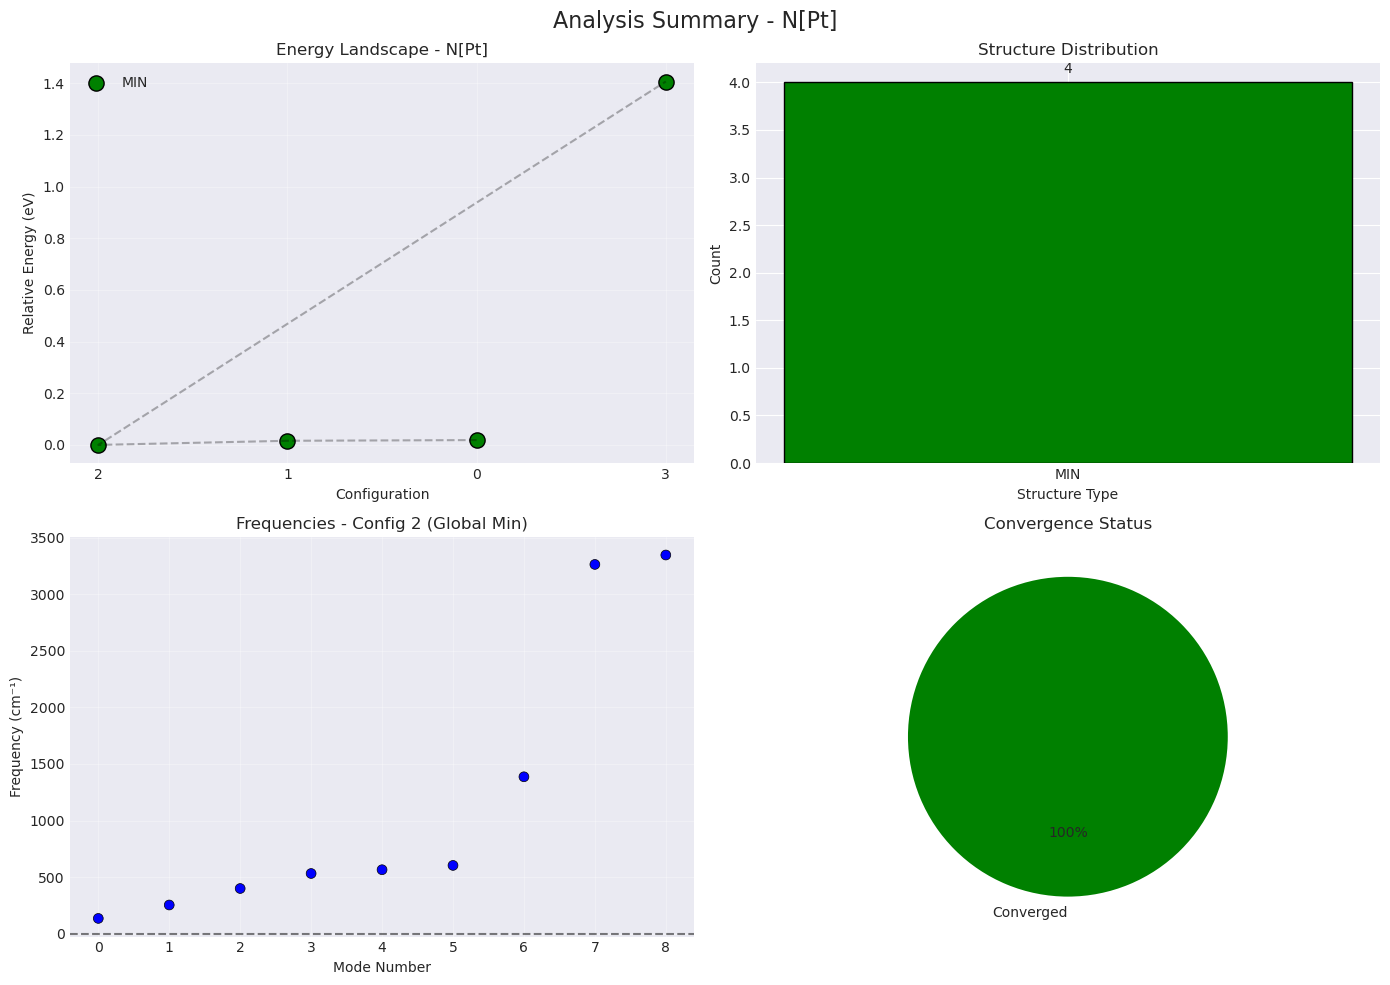

In [21]:
# Cell 6: Visualizations for the single adsorbate
if 'df_single' in locals() and not df_single.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Energy landscape
    ax = axes[0, 0]
    if 'Rel_E' in df_single.columns:
        colors = {'MIN': 'green', 'TS': 'red'}
        for struct_type in df_single['Type'].unique():
            mask = df_single['Type'] == struct_type
            ax.scatter(df_single[mask]['Config'], df_single[mask]['Rel_E'], 
                      c=colors.get(struct_type, 'orange'), s=120, 
                      label=struct_type, edgecolor='black', linewidth=1)
        
        # Connect points
        sorted_df = df_single.sort_values('Config')
        ax.plot(sorted_df['Config'], sorted_df['Rel_E'], 'k--', alpha=0.3)
        
        ax.set_xlabel('Configuration')
        ax.set_ylabel('Relative Energy (eV)')
        ax.set_title(f'Energy Landscape - {adsorbate_name}')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # 2. Structure type distribution
    ax = axes[0, 1]
    type_counts = df_single['Type'].value_counts()
    colors_map = {'MIN': 'green', 'TS': 'red'}
    colors = [colors_map.get(t, 'orange') for t in type_counts.index]
    bars = ax.bar(type_counts.index, type_counts.values, color=colors, edgecolor='black')
    ax.set_xlabel('Structure Type')
    ax.set_ylabel('Count')
    ax.set_title('Structure Distribution')
    
    # Add count labels
    for bar, count in zip(bars, type_counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                str(count), ha='center')
    
    # 3. Frequency analysis for one config
    ax = axes[1, 0]
    # Get the global minimum configuration
    if not df_single.empty:
        min_config = df_single.iloc[0]
        vib_file = os.path.join(min_config['Path'], 'vib.json_vib.json')
        
        if os.path.exists(vib_file):
            frequencies, _ = load_frequencies_from_json(vib_file)
            
            # Create frequency spectrum
            imag_mask = np.abs(frequencies.imag) > 1e-6
            freq_values = np.zeros(len(frequencies))
            freq_values[~imag_mask] = frequencies[~imag_mask].real
            freq_values[imag_mask] = -np.abs(frequencies[imag_mask].imag)
            
            colors = ['red' if imag else 'blue' for imag in imag_mask]
            sizes = [100 if imag else 50 for imag in imag_mask]
            
            ax.scatter(range(len(frequencies)), freq_values, c=colors, s=sizes, 
                      edgecolor='black', linewidth=0.5)
            ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
            ax.set_xlabel('Mode Number')
            ax.set_ylabel('Frequency (cm⁻¹)')
            ax.set_title(f'Frequencies - Config {min_config["Config"]} (Global Min)')
            ax.grid(True, alpha=0.3)
    
    # 4. Convergence statistics
    ax = axes[1, 1]
    if 'Converged' in df_single.columns:
        conv_counts = df_single['Converged'].value_counts()
        colors = ['green' if val else 'red' for val in conv_counts.index]
        labels = ['Converged' if val else 'Not Converged' for val in conv_counts.index]
        
        wedges, texts, autotexts = ax.pie(conv_counts.values, labels=labels, colors=colors, 
                                          autopct='%1.0f%%', startangle=90)
        ax.set_title('Convergence Status')
    else:
        ax.text(0.5, 0.5, 'No convergence data', ha='center', va='center', 
                transform=ax.transAxes)
        ax.axis('off')
    
    plt.suptitle(f'Analysis Summary - {adsorbate_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

In [22]:
# Cell 7: Analyze all adsorbates
if 'base_path' in locals() and 'adsorbates' in locals():
    print("Analyzing all adsorbates... This may take a few minutes.")
    print("="*60)
    
    all_results = {}
    master_summary = []
    
    for i, adsorbate in enumerate(sorted(adsorbates), 1):
        print(f"\n[{i}/{len(adsorbates)}] Processing {adsorbate}...", end='', flush=True)
        adsorbate_path = os.path.join(base_path, adsorbate)
        
        try:
            # Analyze
            df = analyze_adsorbate(adsorbate_path)
            
            if not df.empty:
                all_results[adsorbate] = df
                
                # Create summary
                summary = {
                    'Adsorbate': adsorbate,
                    'N_Configs': len(df),
                    'N_MIN': (df['Type'] == 'MIN').sum() if 'Type' in df.columns else 0,
                    'N_TS': (df['Type'] == 'TS').sum() if 'Type' in df.columns else 0,
                }
                
                if 'Energy' in df.columns and df['Energy'].notna().any():
                    min_row = df.iloc[0]  # Already sorted by energy
                    summary['Min_Config'] = min_row['Config']
                    summary['Min_Energy'] = min_row['Energy']
                    summary['Formula'] = min_row.get('Formula', '')
                
                master_summary.append(summary)
                print(" ✓")
            else:
                print(" ✗ (no valid configs)")
                
        except Exception as e:
            print(f" ✗ (error: {e})")
    
    # Create master DataFrame
    master_df = pd.DataFrame(master_summary)
    if 'Min_Energy' in master_df.columns:
        master_df = master_df.sort_values('Min_Energy')
    
    print("\n" + "="*60)
    print("MASTER SUMMARY")
    print("="*60)
    print(master_df.to_string(index=False))

Analyzing all adsorbates... This may take a few minutes.

[1/12] Processing C... ✓

[2/12] Processing N... ✓

[3/12] Processing N#[Pt]... ✓

[4/12] Processing N=[Pt]... ✓

[5/12] Processing N[Pt]... ✓

[6/12] Processing O... ✓

[7/12] Processing O=O... ✓

[8/12] Processing O=[Pt]... ✓

[9/12] Processing O[Pt]... ✓

[10/12] Processing [H]... ✓

[11/12] Processing [H][H]... ✓

[12/12] Processing [Pt]... ✓

MASTER SUMMARY
Adsorbate  N_Configs  N_MIN  N_TS Min_Config   Min_Energy Formula
      O=O          1      0     0          0 -4089.779434      O2
        O          1      0     0          0 -2079.864423     H2O
        N          1      0     0          0 -1538.810982     H3N
        C          1      0     0          0 -1101.817960     CH4
    N[Pt]          4      4     0          2  -197.799875 H2Fe27N
   N=[Pt]          4      1     0          0  -194.769577  HFe27N
    O[Pt]          4      2     2          1  -192.535662  HFe27O
   N#[Pt]          4      3     1          1  -19

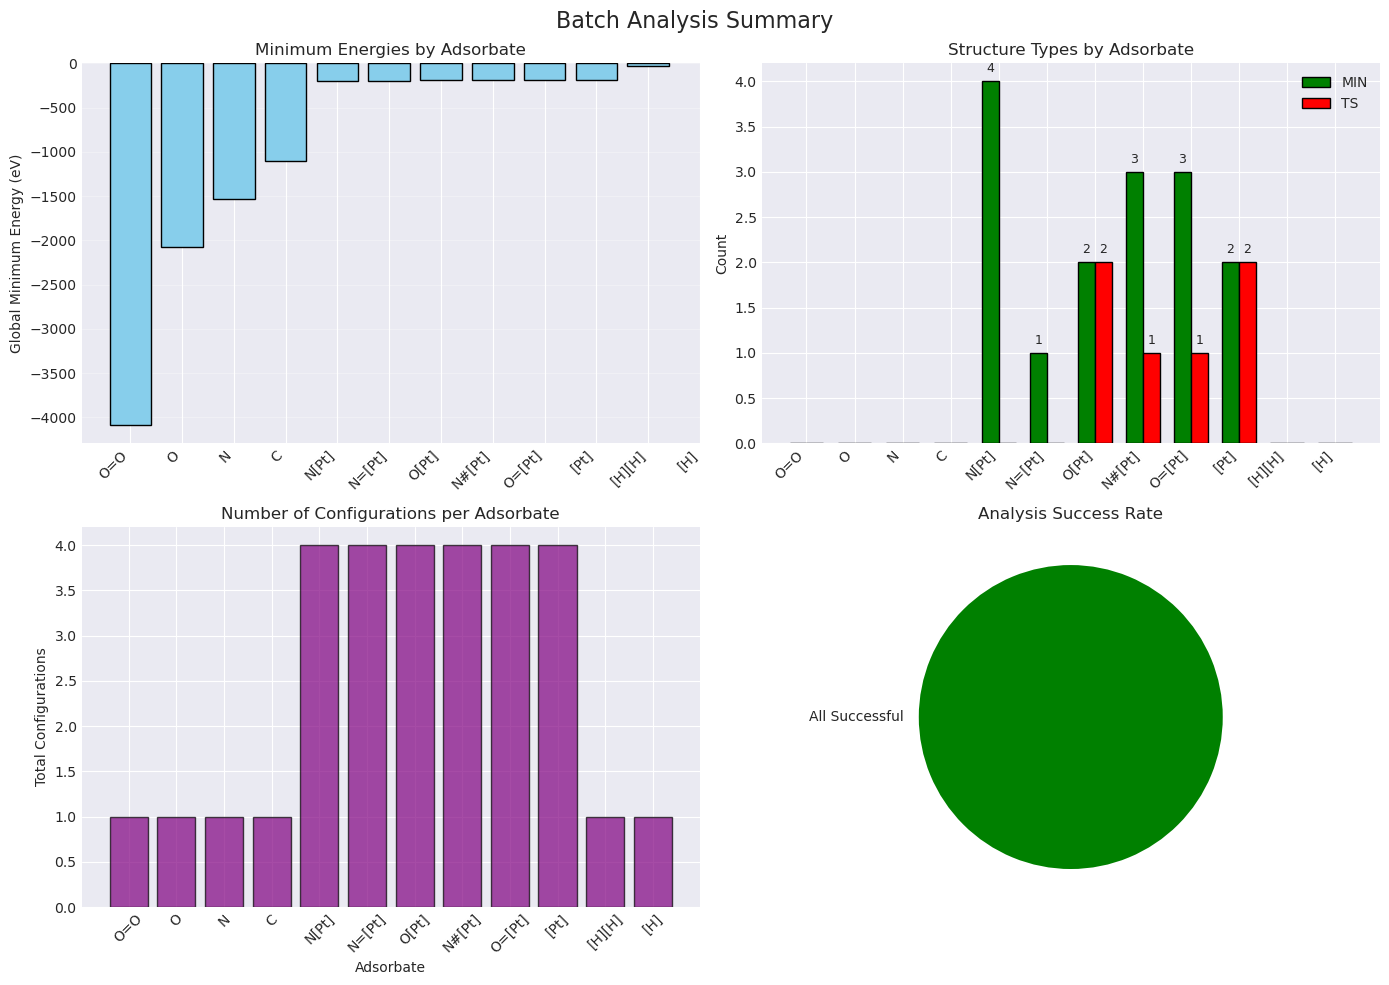

In [23]:
# Cell 8: Visualize master summary
if 'master_df' in locals() and not master_df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Energy comparison
    ax = axes[0, 0]
    if 'Min_Energy' in master_df.columns:
        ax.bar(range(len(master_df)), master_df['Min_Energy'], 
               color='skyblue', edgecolor='black')
        ax.set_xticks(range(len(master_df)))
        ax.set_xticklabels(master_df['Adsorbate'], rotation=45, ha='right')
        ax.set_ylabel('Global Minimum Energy (eV)')
        ax.set_title('Minimum Energies by Adsorbate')
        ax.grid(True, alpha=0.3, axis='y')
    
    # 2. Configuration counts
    ax = axes[0, 1]
    width = 0.35
    x = np.arange(len(master_df))
    
    bars1 = ax.bar(x - width/2, master_df['N_MIN'], width, 
                    label='MIN', color='green', edgecolor='black')
    bars2 = ax.bar(x + width/2, master_df['N_TS'], width, 
                    label='TS', color='red', edgecolor='black')
    
    ax.set_xticks(x)
    ax.set_xticklabels(master_df['Adsorbate'], rotation=45, ha='right')
    ax.set_ylabel('Count')
    ax.set_title('Structure Types by Adsorbate')
    ax.legend()
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                       f'{int(height)}', ha='center', fontsize=9)
    
    # 3. Total configurations
    ax = axes[1, 0]
    ax.bar(master_df['Adsorbate'], master_df['N_Configs'], 
           color='purple', alpha=0.7, edgecolor='black')
    ax.set_xlabel('Adsorbate')
    ax.set_ylabel('Total Configurations')
    ax.set_title('Number of Configurations per Adsorbate')
    ax.tick_params(axis='x', rotation=45)
    
    # 4. Success rate pie chart
    ax = axes[1, 1]
    success_counts = {
        'Analyzed': len(master_df),
        'Failed': len(adsorbates) - len(master_df)
    }
    if success_counts['Failed'] > 0:
        ax.pie(success_counts.values(), labels=success_counts.keys(), 
               colors=['green', 'red'], autopct='%1.0f%%')
    else:
        ax.pie([1], labels=['All Successful'], colors=['green'])
    ax.set_title('Analysis Success Rate')
    
    plt.suptitle('Batch Analysis Summary', fontsize=16)
    plt.tight_layout()
    plt.show()

Detailed Comparison:
Adsorbate  N_Configs  N_MIN  N_TS  E_MIN     E_TS  Barrier
   N#[Pt]          4      3     1    0.0 4.045119 4.045119
    O[Pt]          4      2     2    0.0 0.018922 0.018922
   O=[Pt]          4      3     1    0.0 2.164946 2.164946
     [Pt]          4      2     2    0.0 1.699684 1.699684


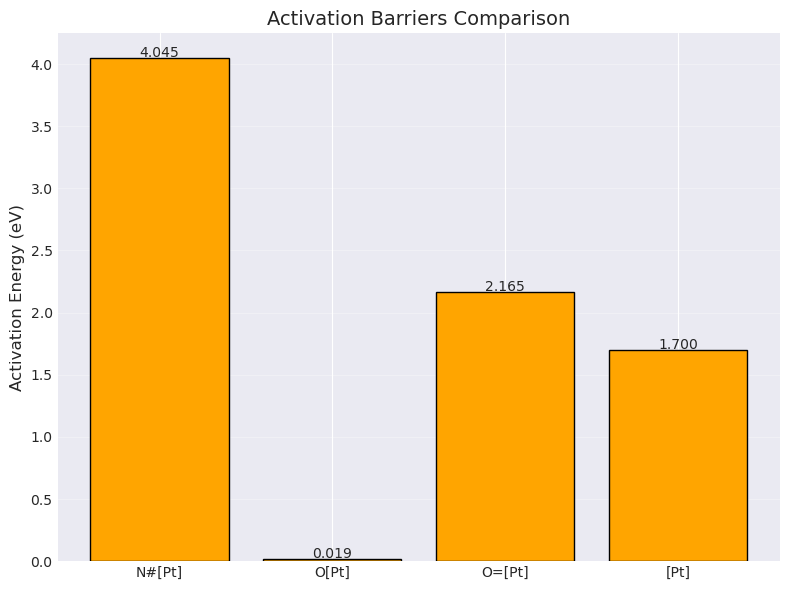

In [27]:
# Cell 9: Detailed comparison of selected adsorbates
# MODIFY THIS LIST to compare specific adsorbates
selected_adsorbates = ['N#[Pt]', 'O[Pt]', 'O=[Pt]', '[Pt]']  # Change as needed

if 'all_results' in locals():
    comparison_data = []
    
    for ads_name in selected_adsorbates:
        if ads_name in all_results:
            df = all_results[ads_name]
            
            # Get statistics
            data = {
                'Adsorbate': ads_name,
                'N_Configs': len(df),
                'N_MIN': (df['Type'] == 'MIN').sum() if 'Type' in df.columns else 0,
                'N_TS': (df['Type'] == 'TS').sum() if 'Type' in df.columns else 0,
            }
            
            # Energy info
            if 'Rel_E' in df.columns:
                mins = df[df['Type'] == 'MIN'] if 'Type' in df.columns else df
                tss = df[df['Type'] == 'TS'] if 'Type' in df.columns else pd.DataFrame()
                
                if not mins.empty:
                    data['E_MIN'] = 0.0  # Lowest MIN is reference
                
                if not tss.empty:
                    data['E_TS'] = tss.iloc[0]['Rel_E']
                    data['Barrier'] = data['E_TS']
            
            comparison_data.append(data)
    
    if comparison_data:
        comp_df = pd.DataFrame(comparison_data)
        print("Detailed Comparison:")
        print(comp_df.to_string(index=False))
        
        # Plot barriers
        if 'Barrier' in comp_df.columns:
            plt.figure(figsize=(8, 6))
            barriers = comp_df.dropna(subset=['Barrier'])
            
            bars = plt.bar(barriers['Adsorbate'], barriers['Barrier'], 
                           color='orange', edgecolor='black', linewidth=1)
            
            # Add value labels
            for bar, val in zip(bars, barriers['Barrier']):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{val:.3f}', ha='center')
            
            plt.ylabel('Activation Energy (eV)', fontsize=12)
            plt.title('Activation Barriers Comparison', fontsize=14)
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()

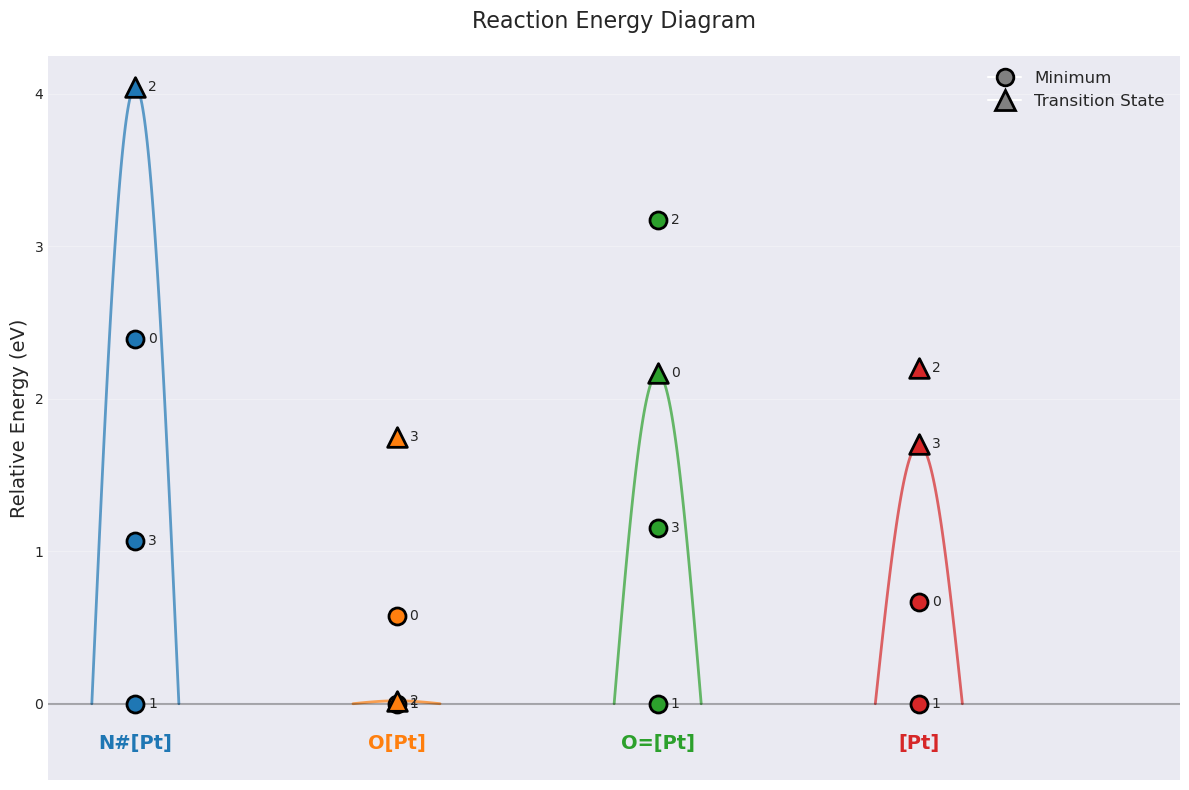

In [28]:
# Cell 10: Create energy diagram for selected adsorbates
if 'all_results' in locals() and 'selected_adsorbates' in locals():
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x_offset = 0
    x_spacing = 3
    
    for i, ads_name in enumerate(selected_adsorbates):
        if ads_name in all_results:
            df = all_results[ads_name]
            
            if 'Rel_E' in df.columns:
                # Use different colors for each adsorbate
                color = plt.cm.tab10(i)
                
                # Plot each configuration
                for _, row in df.iterrows():
                    x = x_offset
                    y = row['Rel_E']
                    
                    # Marker style based on type
                    if row.get('Type') == 'MIN':
                        marker = 'o'
                        size = 150
                    elif row.get('Type') == 'TS':
                        marker = '^'
                        size = 200
                    else:
                        marker = 's'
                        size = 150
                    
                    ax.scatter(x, y, c=[color], s=size, marker=marker,
                              edgecolor='black', linewidth=2, zorder=3)
                    
                    # Add config label
                    ax.text(x + 0.15, y, row['Config'], fontsize=10, va='center')
                
                # Connect lowest MIN to lowest TS
                mins = df[df['Type'] == 'MIN'].sort_values('Rel_E')
                tss = df[df['Type'] == 'TS'].sort_values('Rel_E')
                
                if not mins.empty and not tss.empty:
                    # Draw reaction path
                    min_y = mins.iloc[0]['Rel_E']
                    ts_y = tss.iloc[0]['Rel_E']
                    
                    # Smooth curve through MIN -> TS
                    x_curve = np.linspace(x - 0.5, x + 0.5, 100)
                    y_curve = min_y + (ts_y - min_y) * np.sin(np.pi * (x_curve - x + 0.5))
                    ax.plot(x_curve, y_curve, '-', color=color, linewidth=2, alpha=0.7)
                
                # Add adsorbate label
                ax.text(x, -0.3, ads_name, fontsize=14, ha='center', 
                       weight='bold', color=color)
                
                x_offset += x_spacing
    
    # Styling
    ax.set_xlim(-1, x_offset)
    ax.set_ylim(-0.5, ax.get_ylim()[1])
    ax.set_ylabel('Relative Energy (eV)', fontsize=14)
    ax.set_title('Reaction Energy Diagram', fontsize=16, pad=20)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xticks([])
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markersize=12, label='Minimum', markeredgecolor='black', markeredgewidth=2),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='gray',
               markersize=14, label='Transition State', markeredgecolor='black', markeredgewidth=2)
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [31]:
def find_reaction_paths(all_results_dict, ads_name):
    """Find possible reaction paths in an adsorbate"""
    if ads_name not in all_results_dict:
        print(f"Adsorbate {ads_name} not found")
        return
    
    df = all_results_dict[ads_name]
    
    mins = df[df['Type'] == 'MIN'].sort_values('Rel_E') if 'Type' in df.columns else pd.DataFrame()
    tss = df[df['Type'] == 'TS'].sort_values('Rel_E') if 'Type' in df.columns else pd.DataFrame()
    
    if mins.empty or tss.empty:
        print("Need both minima and transition states for reaction paths")
        return
    
    print(f"Possible reaction paths for {ads_name}:")
    print("-"*50)
    
    # Simple approach: connect each TS to nearest minima
    for _, ts in tss.iterrows():
        ts_energy = ts['Rel_E']
        
        # Find minima lower in energy
        lower_mins = mins[mins['Rel_E'] < ts_energy]
        higher_mins = mins[mins['Rel_E'] > ts_energy]
        
        if not lower_mins.empty:
            reactant = lower_mins.iloc[-1]  # Closest lower minimum
            
            if not higher_mins.empty:
                product = higher_mins.iloc[0]  # Closest higher minimum
                
                print(f"\nPath: {reactant['Config']} → {ts['Config']} → {product['Config']}")
                print(f"  Energies: {reactant['Rel_E']:.3f} → {ts_energy:.3f} → {product['Rel_E']:.3f} eV")
                print(f"  Forward barrier: {ts_energy - reactant['Rel_E']:.3f} eV")
                print(f"  Reverse barrier: {ts_energy - product['Rel_E']:.3f} eV")
                print(f"  Reaction energy: {product['Rel_E'] - reactant['Rel_E']:.3f} eV")


In [32]:
find_reaction_paths(all_results, 'O[Pt]')

Possible reaction paths for O[Pt]:
--------------------------------------------------

Path: 1 → 2 → 0
  Energies: 0.000 → 0.019 → 0.576 eV
  Forward barrier: 0.019 eV
  Reverse barrier: -0.557 eV
  Reaction energy: 0.576 eV


In [36]:
find_reaction_paths(all_results, 'N#[Pt]')

Possible reaction paths for N#[Pt]:
--------------------------------------------------


In [37]:
find_reaction_paths(all_results, 'O=[Pt]')

Possible reaction paths for O=[Pt]:
--------------------------------------------------

Path: 3 → 0 → 2
  Energies: 1.153 → 2.165 → 3.172 eV
  Forward barrier: 1.012 eV
  Reverse barrier: -1.007 eV
  Reaction energy: 2.019 eV


In [38]:
find_reaction_paths(all_results, '[Pt]')

Possible reaction paths for [Pt]:
--------------------------------------------------


# Analyze Transition State


In [ ]:
ts_path = os.path.join(path,"TS3") #specify the TS directory to analyze

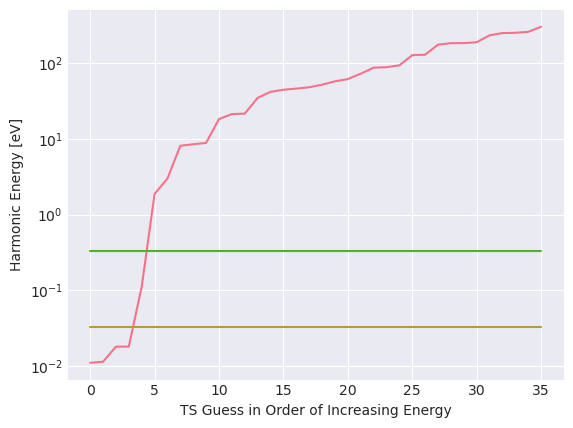

In [ ]:
plot_eharm(ts_path,Eharmtol=3.0,Eharmfiltertol=30.0) #plot the harmonic energies of the transition state guesses and cutoffs 

In [ ]:
kinetics = get_kinetics(ts_path,os.path.join(os.path.split(ts_path)[0],"Adsorbates"),metal,facet,slab,sites,site_adjacency,nslab,site_density,
                c_ref=c_ref,o_ref=o_ref,h_ref=0.0,n_ref=0.0)
minkinind = min({k:v for k,v in kinetics.items() if v.valid},key=lambda x: kinetics[x].barrier_f) #index of lowest energy valid configuration

In [ ]:
print(kinetics[minkinind].reaction_str) #Reaction String

O[Pt] + vacantX <=> [Pt] + O=[Pt]


In [ ]:
print("Forward Barriers: {} [eV]".format({k:v.barrier_f for k,v in kinetics.items()}))
print("Reverse Barriers: {} [eV]".format({k:v.barrier_r for k,v in kinetics.items()}))
print("Automated Validity Determination: {}".format({k:v.valid for k,v in kinetics.items()}))

Forward Barriers: {'10': 0.4842861957319826, '18': 0.6640245592363954, '22': 0.6639965267807213} [eV]
Reverse Barriers: {'10': 3.7500546580794207, '18': 3.9297930215838335, '22': 3.9297649891281594} [eV]
Automated Validity Determination: {'10': True, '18': True, '22': True}


In [ ]:
#Individual Transition States/Kinetics
ind = minkinind #'7' etc.
kin = kinetics[ind]

In [ ]:
print("Frequencies: {} cm^-1".format(kin.transition_state.vibdata.get_frequencies()))

Frequencies: [   0.        +1020.17775391j  174.93777347   +0.j
  214.59081866   +0.j          453.24854409   +0.j
  511.18765111   +0.j         1073.31368096   +0.j        ] cm^-1


In [ ]:
kin.arr_f #Forward rate coefficient

SurfaceArrhenius(A=(7.15689e-09,'m^2/(molecule*s)'), n=0.658701, Ea=(46.6652,'kJ/mol'), T0=(1,'K'), Tmin=(298.15,'K'), Tmax=(2000,'K'), comment="""Fitted to 172 data points; dA = *|/ 1.01111, dn = +|- 0.00142408, dEa = +|- 0.00896879 kJ/mol""")

In [ ]:
kin.arr_r #Reverse rate coefficient

SurfaceArrhenius(A=(9.11756e-22,'m^2/(molecule*s)'), n=5.54922, Ea=(355.93,'kJ/mol'), T0=(1,'K'), Tmin=(298.15,'K'), Tmax=(2000,'K'), comment="""Fitted to 172 data points; dA = *|/ 1.07651, dn = +|- 0.00949873, dEa = +|- 0.0598228 kJ/mol""")

In [ ]:
#Specific Thermodynamic Properties J-mol-K
T = 1000.0
print("dGrxn(T={0}): {1} kcal/mol".format(T,kin.get_gibbs_energy_reaction(T)/4184.0))
print("dHrxn(T={0}): {1} kcal/mol".format(T,kin.get_enthalpy_reaction(T)/4184.0))
print("dSrxn(T={0}): {1} cal/(mol K)".format(T,kin.get_entropy_reaction(T)/4.184))

dGrxn(T=1000.0): -74.06766165551475 kcal/mol
dHrxn(T=1000.0): -74.9311702127068 kcal/mol
dSrxn(T=1000.0): -0.8635085571877404 cal/(mol K)


In [ ]:
#Check TS Validity Information
kin.valid_info

{'TS_direct_Validation': True,
 'IRC_Validation': True,
 'One_Endpoint_Valid': True,
 'IRC_Endpoints_Match': False,
 'Short_IRC': False,
 'Struct Validation': True,
 'Freq Alignment Validation': True,
 'Reaction_Bond_Freq_Alignments': [1.3187296303884954],
 'Fixed_Bond_Freq_Alignments': []}

In [ ]:
#Visualize TS
view(read(os.path.join(ts_path,ind,"opt.xyz")))

In [ ]:
#Visualize IRC1 
view(Trajectory(os.path.join(ts_path,ind,"irc_forward.traj")))

usage: ase [-h] [--version] [-T]
           {help,info,test,gui,db,run,band-structure,build,dimensionality,eos,ulm,find,nebplot,nomad-upload,nomad-get,convert,reciprocal,completion,diff,exec}
           ...
ase: error: TclError: no display name and no $DISPLAY environment variable
To get a full traceback, use: ase -T gui ...


In [ ]:
#Visualize IRC2
view(Trajectory(os.path.join(ts_path,ind,"irc_reverse.traj")))

usage: ase [-h] [--version] [-T]
           {help,info,test,gui,db,run,band-structure,build,dimensionality,eos,ulm,find,nebplot,nomad-upload,nomad-get,convert,reciprocal,completion,diff,exec}
           ...
ase: error: TclError: no display name and no $DISPLAY environment variable
To get a full traceback, use: ase -T gui ...


In [ ]:
#Visualize Imaginary Frequency
view(Trajectory(os.path.join(ts_path,ind,"vib.0.traj")))

usage: ase [-h] [--version] [-T]
           {help,info,test,gui,db,run,band-structure,build,dimensionality,eos,ulm,find,nebplot,nomad-upload,nomad-get,convert,reciprocal,completion,diff,exec}
           ...
ase: error: TclError: no display name and no $DISPLAY environment variable
To get a full traceback, use: ase -T gui ...


usage: ase [-h] [--version] [-T]
           {help,info,test,gui,db,run,band-structure,build,dimensionality,eos,ulm,find,nebplot,nomad-upload,nomad-get,convert,reciprocal,completion,diff,exec}
           ...
ase: error: TclError: no display name and no $DISPLAY environment variable
To get a full traceback, use: ase -T gui ...
